In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
from sklearn.model_selection import GridSearchCV, StratifiedKFold  # , cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support, confusion_matrix  # , classification_report


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('./data/datos_modelo2.csv')

/home/mauro/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4166,4167,4168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data["id"] = data.index + 1

In [4]:
data.shape

(36360, 4173)

In [5]:
# mp = 680
# z2 = 595
# z3 = 401 
# ea = 2483

# Classify only with demographic data 

In [36]:
demoColumns = data.columns[680+595+401+2483:]

In [37]:
demoData = data[demoColumns]

In [38]:
demoData

,idGenero,edad_grupos,idEstadoCivil,Medicion1_PA_Sistolica,Medicion2_PA_Diastolica,Medicion3_Frecuencia_cardiaca,Medicion4_Frec_Respiratoria,Medicion5_Temperatura,Medicion6_Peso,Medicion7_Talla,Medicion8_IMC,codigoDiagnostico,Analisis,id
0,2.0,78-84,6.000000,123.000000,62.000000,95.000000,18.000000,35.7,69,147,31.930000,J449,PULMONAR,1
1,1.0,1-67,9.000000,140.000000,80.000000,70.000000,17.000000,36,111,176,35.830000,J449,PULMONAR,2
2,2.0,1-67,1.000000,80.000000,120.000000,78.000000,17.000000,36.5,67,158,26.840000,I10X,HIPERTENCION,3
3,2.0,68-77,6.000000,115.000000,70.000000,72.000000,16.000000,36,59,143,28.850000,J449,PULMONAR,4
4,2.0,1-67,1.000000,120.000000,80.000000,74.000000,19.000000,37,64,150,28.440000,E119,DIABETES,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36355,2.0,1-67,6.000000,118.200720,72.627749,80.899640,17.000000,36.2,66,160,29.432383,G402,EPILEPSIA,36356
36356,2.0,>84,2.575869,121.819017,71.819017,67.151738,18.424131,36,59,155,30.684205,G400,EPILEPSIA,36357
36357,2.0,68-77,1.000000,128.112843,75.253897,74.915368,17.000000,36.2,55,160,25.551797,G409,EPILEPSIA,36358
36358,1.0,78-84,4.211584,121.922772,70.730495,65.192277,17.615446,36,65,166,20.363148,G408,EPILEPSIA,36359


In [39]:
uniqAges = demoData.edad_grupos.unique()
uniqAges = {x:i for i,x in enumerate(uniqAges)}

target = demoData.Analisis.unique()
target = {x:i for i,x in enumerate(target)}


print(uniqAges)
print(target)


{'78-84': 0, '1-67': 1, '68-77': 2, '>84': 3}
{'PULMONAR': 0, 'HIPERTENCION': 1, 'DIABETES': 2, 'APNEA': 3, 'EPILEPSIA': 4}


In [40]:
demoData['edad_grupos'] = list(map(lambda x:uniqAges[x], demoData['edad_grupos']))

/home/mauro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
demoData['Analisis'] = list(map(lambda x:target[x], demoData['Analisis']))

/home/mauro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
demoData.dtypes 

idGenero                         float64
edad_grupos                        int64
idEstadoCivil                    float64
Medicion1_PA_Sistolica           float64
Medicion2_PA_Diastolica          float64
Medicion3_Frecuencia_cardiaca    float64
Medicion4_Frec_Respiratoria      float64
Medicion5_Temperatura             object
Medicion6_Peso                    object
Medicion7_Talla                   object
Medicion8_IMC                    float64
codigoDiagnostico                 object
Analisis                           int64
id                                 int64
dtype: object

In [55]:
demoData['Medicion5_Temperatura'] = demoData['Medicion5_Temperatura'].astype(str).str.replace(',','.')
demoData['Medicion6_Peso'] = demoData['Medicion6_Peso'].astype(str).str.replace(',','.')
demoData['Medicion7_Talla'] = demoData['Medicion7_Talla'].astype(str).str.replace(',','.')

/home/mauro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mauro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mauro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [56]:
demoData.dtypes

idGenero                         float64
edad_grupos                        int64
idEstadoCivil                    float64
Medicion1_PA_Sistolica           float64
Medicion2_PA_Diastolica          float64
Medicion3_Frecuencia_cardiaca    float64
Medicion4_Frec_Respiratoria      float64
Medicion5_Temperatura             object
Medicion6_Peso                    object
Medicion7_Talla                   object
Medicion8_IMC                    float64
codigoDiagnostico                 object
Analisis                           int64
id                                 int64
dtype: object

In [57]:
demoData.isna().sum()

idGenero                         0
edad_grupos                      0
idEstadoCivil                    0
Medicion1_PA_Sistolica           0
Medicion2_PA_Diastolica          0
Medicion3_Frecuencia_cardiaca    0
Medicion4_Frec_Respiratoria      0
Medicion5_Temperatura            0
Medicion6_Peso                   0
Medicion7_Talla                  0
Medicion8_IMC                    0
codigoDiagnostico                0
Analisis                         0
id                               0
dtype: int64

In [58]:
# df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
demoData[demoData.columns[:-3]] = demoData[demoData.columns[:-3]].apply(pd.to_numeric)

/home/mauro/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [59]:
demoData.dtypes

idGenero                         float64
edad_grupos                        int64
idEstadoCivil                    float64
Medicion1_PA_Sistolica           float64
Medicion2_PA_Diastolica          float64
Medicion3_Frecuencia_cardiaca    float64
Medicion4_Frec_Respiratoria      float64
Medicion5_Temperatura            float64
Medicion6_Peso                   float64
Medicion7_Talla                  float64
Medicion8_IMC                    float64
codigoDiagnostico                 object
Analisis                           int64
id                                 int64
dtype: object

In [60]:
xfeatures = demoData.columns[:-3]
yfeature = demoData.columns[-2]

# Split data

In [61]:
def splitTrainTest(dataframe):
    #create output dataframes
    test = pd.DataFrame(columns = demoData.columns)

    train = pd.DataFrame(columns = demoData.columns)
    
    for uClass in dataframe.Analisis.unique():
        #get each class 
        classDf = dataframe[dataframe.Analisis == uClass]
        
        # randomly choose 25% of indices 
        ids = [x for x in range(classDf.shape[0])]
        testInd = np.random.choice(ids, int(0.25*len(ids)),replace=False)
        
        trainInd = list(set(ids)-set(testInd))

        #get dataframes
        test = pd.concat([test,classDf.iloc[testInd]])
        
        train = pd.concat([train,classDf.iloc[trainInd]])

    return train,test

In [62]:
train,test = splitTrainTest(demoData)
assert train.shape[0]+test.shape[0] == demoData.shape[0]

In [63]:
np.savetxt('./data/trainids.txt', train.id.values, delimiter=',')
np.savetxt('./data/testids.txt', test.id.values, delimiter=',')


## Random Forest attempt


In [65]:
#hypermarameters that gridsearch will optimize
def rf():
    params = {
        'n_estimators': [200, 700],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    return RandomForestClassifier(random_state=0, class_weight='balanced'), params

#metrics to be analized
def scorers():
    scoring = {'accuracy': make_scorer(accuracy_score),
               'precision': make_scorer(precision_score, average='weighted'),
               'recall': make_scorer(recall_score, average='weighted'),
               'f1_score': make_scorer(f1_score, average='weighted')
               }
    return scoring

In [77]:
train['Analisis'] = train['Analisis'].apply(pd.to_numeric)
test['Analisis'] = test['Analisis'].apply(pd.to_numeric)

In [78]:
#learning 
model,params = rf()
grid_search = GridSearchCV(model, params, cv=StratifiedKFold(2), scoring=scorers(),
                           refit='f1_score', return_train_score=True,verbose=100)
grid_search.fit(train[xfeatures], train[yfeature])




Fitting 2 folds for each of 6 candidates, totalling 12 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=(train=1.000, test=0.652), f1_score=(train=1.000, test=0.613), precision=(train=1.000, test=0.672), recall=(train=1.000, test=0.652), total=   5.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s
[CV] max_features=auto, n_estimators=200 .............................
[CV]  max_features=auto, n_estimators=200, accuracy=(train=1.000, test=0.644), f1_score=(train=1.000, test=0.603), precision=(train=1.000, test=0.654), recall=(train=1.000, test=0.644), total=   5.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.6s remaining:    0.0s
[CV] max_features=auto, n_estimators=700 .............................
[CV]  max_features=auto, n_estimators=700, accuracy=(train=1.000, test=0.652), f1_scor

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             pre_dispatch='2*n_jobs', refit='f1_score', return_train_sc

In [79]:
clf = grid_search

In [80]:
cm = confusion_matrix(test.Analisis, clf.predict(test[xfeatures])).transpose()


In [82]:
cm

array([[4306,  748,  216,  414,  143],
       [  47,  443,   33,   51,   18],
       [  10,    7,  119,    3,    0],
       [ 160,  114,   58,  684,   48],
       [  67,   40,   13,   41, 1306]])

In [83]:
{'PULMONAR': 0, 'HIPERTENCION': 1, 'DIABETES': 2, 'APNEA': 3, 'EPILEPSIA': 4}


{'PULMONAR': 0, 'HIPERTENCION': 1, 'DIABETES': 2, 'APNEA': 3, 'EPILEPSIA': 4}

In [85]:
normedMatrix = cm.copy()
# print(normedMatrix)
for i in range(len(normedMatrix)):
#     print(normedMatrix[:,i]/normedMatrix[:,i].sum())
    normedMatrix[:,i] = normedMatrix[:,i]/normedMatrix[:,i].sum()
#     print(normedMatrix[:,i])
# np.set_printoptions(suppress=True)
print(normedMatrix)
# np.set_printoptions(suppress=False)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [89]:
def fMeasure(precision,recall):
    return 2*precision*recall/(precision+recall)

In [90]:
newMatr = []
for i in range(len(cm)):
    prec = cm[i][i]/(sum(cm[i,:]))
    rec = cm[i][i]/(sum(cm[:,i]))
    newMatr.append([prec,rec,fMeasure(prec,rec),sum(cm[:,i])])

In [95]:
normedMatrix

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [91]:
np.set_printoptions(suppress=True)
print('    Precision        Recall         F-score      Cover')
print(np.array(newMatr))
np.set_printoptions(suppress=False)

    Precision        Recall         F-score      Cover
[[   0.73897374    0.93812636    0.82672554 4590.        ]
 [   0.74831081    0.32766272    0.45576132 1352.        ]
 [   0.85611511    0.27107062    0.41176471  439.        ]
 [   0.64285714    0.57334451    0.60611431 1193.        ]
 [   0.89025222    0.8620462     0.8759222  1515.        ]]


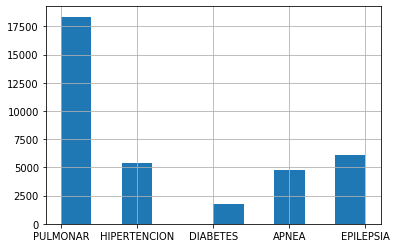

In [97]:
data.Analisis.hist()

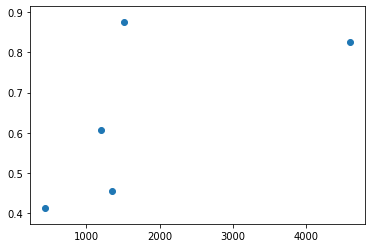

In [104]:
newMatr = np.array(newMatr)
plt.scatter(newMatr[:,-1],newMatr[:,2])

In [102]:
newMatr[:,0]

[0.7389737429208856, 0.9381263616557735, 0.826725544782567, 4590]

In [106]:
demoData

,idGenero,edad_grupos,idEstadoCivil,Medicion1_PA_Sistolica,Medicion2_PA_Diastolica,Medicion3_Frecuencia_cardiaca,Medicion4_Frec_Respiratoria,Medicion5_Temperatura,Medicion6_Peso,Medicion7_Talla,Medicion8_IMC,codigoDiagnostico,Analisis,id
0,2.0,0,6.000000,123.000000,62.000000,95.000000,18.000000,35.7,69.0,147.0,31.930000,J449,0,1
1,1.0,1,9.000000,140.000000,80.000000,70.000000,17.000000,36.0,111.0,176.0,35.830000,J449,0,2
2,2.0,1,1.000000,80.000000,120.000000,78.000000,17.000000,36.5,67.0,158.0,26.840000,I10X,1,3
3,2.0,2,6.000000,115.000000,70.000000,72.000000,16.000000,36.0,59.0,143.0,28.850000,J449,0,4
4,2.0,1,1.000000,120.000000,80.000000,74.000000,19.000000,37.0,64.0,150.0,28.440000,E119,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36355,2.0,1,6.000000,118.200720,72.627749,80.899640,17.000000,36.2,66.0,160.0,29.432383,G402,4,36356
36356,2.0,3,2.575869,121.819017,71.819017,67.151738,18.424131,36.0,59.0,155.0,30.684205,G400,4,36357
36357,2.0,2,1.000000,128.112843,75.253897,74.915368,17.000000,36.2,55.0,160.0,25.551797,G409,4,36358
36358,1.0,0,4.211584,121.922772,70.730495,65.192277,17.615446,36.0,65.0,166.0,20.363148,G408,4,36359


(array([3.617e+04, 5.000e+00, 4.400e+01, 8.100e+01, 4.200e+01, 1.300e+01,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([     0.,  72000., 144000., 216000., 288000., 360000., 432000.,
        504000., 576000., 648000., 720000.]),
 <a list of 10 Patch objects>)

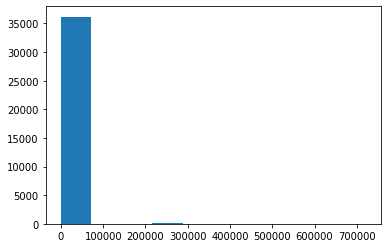

In [126]:
plt.hist(demoData.Medicion8_IMC)

In [124]:
max(demoData.Medicion6_Peso)

645.0

(array([2.9700e+02, 3.9000e+01, 1.2700e+02, 2.1200e+03, 9.2620e+03,
        1.2704e+04, 7.3530e+03, 2.7980e+03, 9.3300e+02, 2.1700e+02,
        8.8000e+01, 5.0000e+01, 2.3000e+01, 1.3000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 0.   ,  4.856,  9.712, 14.568, 19.424, 24.28 , 29.136, 33.992,
        38.848, 43.704, 48.56 , 53.416, 58.272, 63.128, 67.984, 72.84 ,
        77.696, 82.552, 87.408, 92.264, 97.12 ]),
 <a list of 20 Patch objects>)

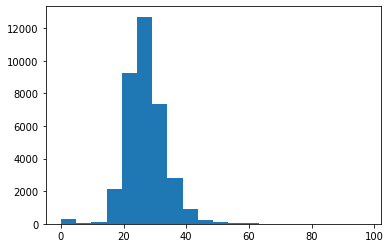

In [132]:
plt.hist(demoData[demoData.Medicion8_IMC<100].Medicion8_IMC,bins=20)

In [118]:
len(demoData[demoData.Medicion2_PA_Diastolica<300])

36352

In [115]:
len(demoData)

36360

In [119]:
36360-36352

8

In [120]:
demoData.idEstadoCivil.unique()

array([6.        , 9.        , 1.        , ..., 8.76163745, 2.57586891,
       4.21158413])

In [135]:
len(data.idEstadoCivil.unique())

1156

In [136]:
demoData.to_csv('./data/demoData.csv')

In [138]:
data.edad_grupos.unique()


array(['78-84', '1-67', '68-77', '>84'], dtype=object)